<a href="https://colab.research.google.com/github/saratchandra26/Bank-Telemarketing-Success-by-Data-Driven-Analysis/blob/main/BTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all important libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/insurance.csv")       #dataset is var for file
dataset.head()                                                                    #Display of dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv')

In [ ]:
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now let’s have a look at the distribution of the regions where people are living according to the dataset:

In [ ]:
import plotly.express as px
pie = dataset["region"].value_counts()
regions = pie.index
population = pie.values
fig = px.pie(dataset, values=population, names=regions)
fig.show()

In [ ]:
dataset.info()   ##Information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.describe()               #Description of data in the dataframe

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


we need to add attributes

In [ ]:
def age_category(value):
  if 18<= value < 35:
    return "youth"
  if 36<= value < 54:
    return "adults"
  if 55<= value < 64:
    return "seniors"
dataset['age_category'] = dataset['age'].map(age_category)
display(dataset.head())

,age,sex,bmi,children,smoker,region,charges,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,youth
1,18,male,33.770,1,no,southeast,1725.55230,youth
2,28,male,33.000,3,no,southeast,4449.46200,youth
3,33,male,22.705,0,no,northwest,21984.47061,youth
4,32,male,28.880,0,no,northwest,3866.85520,youth


In [ ]:
def category(value):
  if value<18:
    return "underweight"
  if 18.5<= value < 24.9:
    return "healthy weight"
  if 25<= value < 29.9:
    return "overweight"
  if 30<= value < 39.9:
    return "obese"
dataset['category'] = dataset['bmi'].map(category)
display(dataset.head())

,age,sex,bmi,children,smoker,region,charges,age_category,category
0,19,female,27.900,0,yes,southwest,16884.92400,youth,overweight
1,18,male,33.770,1,no,southeast,1725.55230,youth,obese
2,28,male,33.000,3,no,southeast,4449.46200,youth,obese
3,33,male,22.705,0,no,northwest,21984.47061,youth,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,youth,overweight


In [ ]:
dataset.shape

(1338, 9)

# **Visualising all numeric variable**





<Figure size 432x864 with 0 Axes>

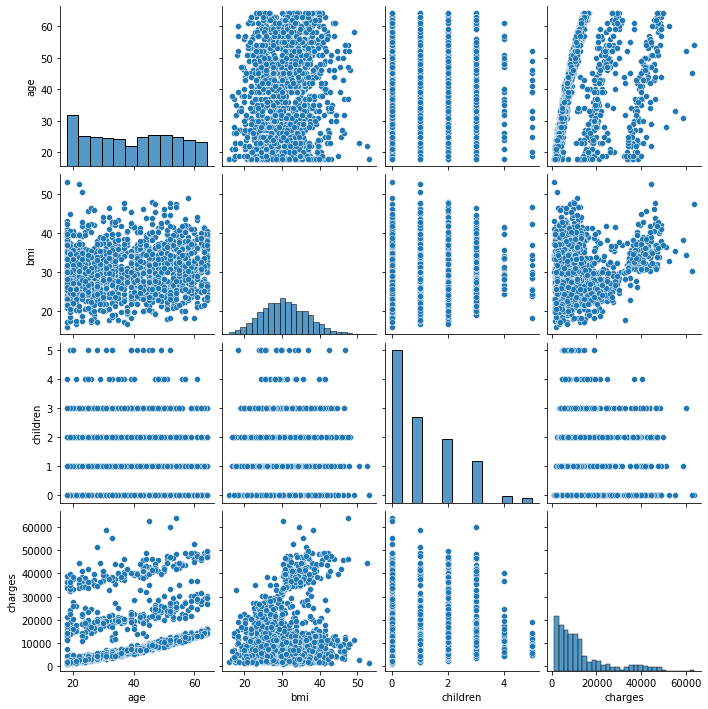

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,12))
sns.pairplot(dataset)
plt.show()

# **correlation**

In [ ]:
corre = dataset.corr()
corre

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
# correlation heatmap

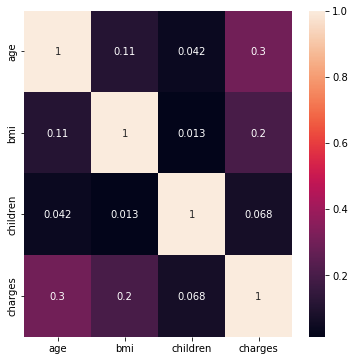

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(corre,annot=True)

# **DATA PREPARATION & CLEANSING**

In [ ]:
dataset.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
age_category     75
category        114
dtype: int64

In [ ]:
#drop missing values in a category column pandas

In [ ]:
dataset = dataset.fillna(dataset.mode().iloc[0])
print(dataset)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

     age_category        category  
0           youth      overweight  
1           youth           obese  
2           youth           obese  
3           you

In [ ]:
dataset.isnull().sum()

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
age_category    0
category        0
dtype: int64

In [ ]:
#Now let’s have a look at the distribution of the regions where people are living according to the dataset:

In [ ]:
import plotly.express as px


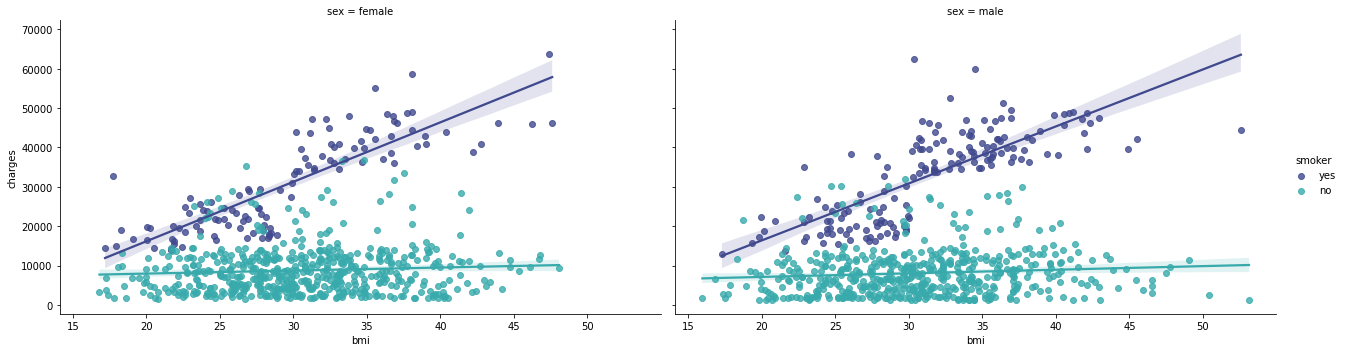

In [ ]:
sns.lmplot(data=dataset, x="bmi", y="charges",hue="smoker", col="sex", height=5, aspect=1.8,palette='mako') # scatter plot between chargers and bmi  with hue smoker.

plt.show()

# **dispersion of all attributes**

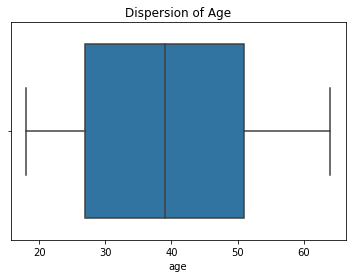

In [ ]:
ax = sns.boxplot(dataset['age'])
ax.set_title('Dispersion of Age')           # No outlier in age column.
plt.show(ax)

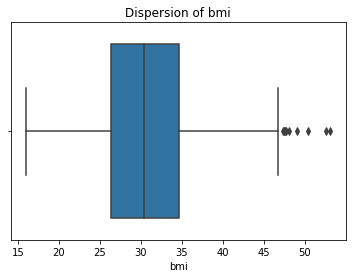

In [ ]:
'''To ensure there are no outliers for bmi by box plot. But, there are few bmi values above 47
which can be considered as outliers'''
ax = sns.boxplot(dataset['bmi'])
ax.set_title("Dispersion of bmi")
plt.show(ax)

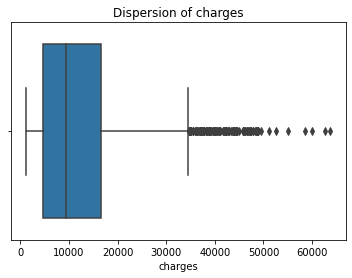

In [ ]:
ax = sns.boxplot(dataset['charges'])
ax.set_title("Dispersion of charges")
plt.show(ax)

# *The scatter plot is not representing, when Age is increasing bmi is also increasing. *
# Few data points of bmi is high at younger age compare to other data points.


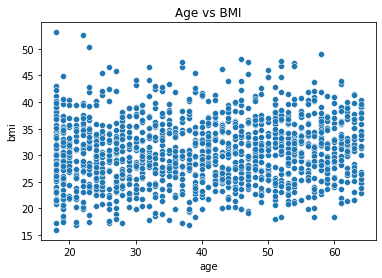

In [ ]:

ax = sns.scatterplot(x = 'age', y = 'bmi', data = dataset)
ax.set_title('Age vs BMI')
plt.show(ax)

# **To comprehend the relationship between age and expenditures in reference to bmi.**

# # The scatter plot clearly shows that when age increases, so do expenses, but there are three distinct categories of expenses, regardless of BMI. As a result, BMI has no effect on the costs associated with age.

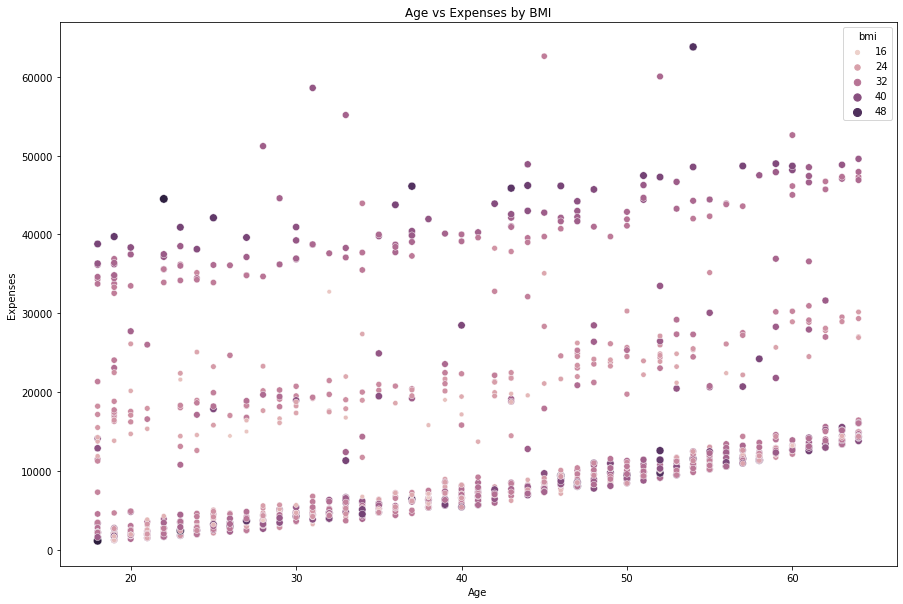

In [ ]:

plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='age',y='charges',hue = 'bmi',size = 'bmi', data=dataset)
ax = ax.set_title("Age vs Expenses by BMI")
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.show(ax)

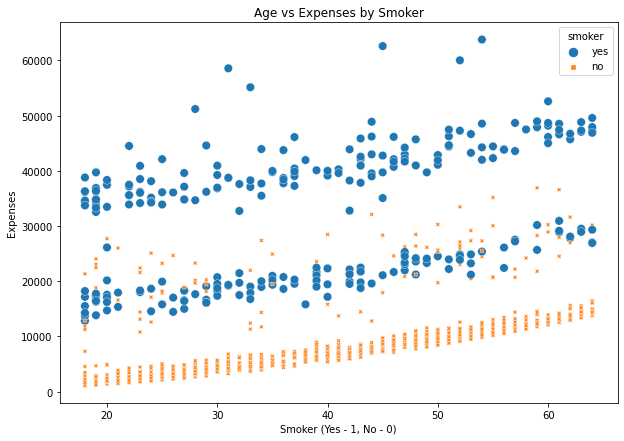

In [ ]:
#Both Age and smoker are highly influncing the expenses. Smoker yes
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x='age',y='charges', hue=dataset['smoker'],style = dataset['smoker'],size = dataset['smoker'], data=dataset)
ax.set_title("Age vs Expenses by Smoker")
plt.xlabel("Smoker (Yes - 1, No - 0)")
plt.ylabel("Expenses")
plt.show(ax)

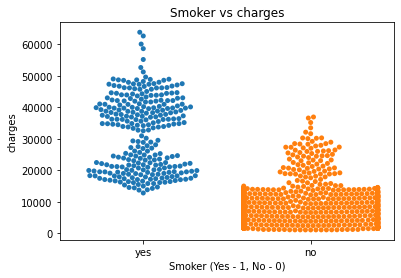

In [ ]:
#The swarm plot depicts how the smoker feature influences the experiences of smokers and non-smokers.
ax = sns.swarmplot(x='smoker',y='charges',data=dataset)
ax.set_title("Smoker vs charges")
plt.xlabel("Smoker (Yes - 1, No - 0)")
plt.ylabel("charges")
plt.show(ax)

In [ ]:
x=dataset.drop('charges',axis=1)
y=dataset['charges']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

# **## Model Training and Testing**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(dataset[col].values))
        dataset[col]=lbl.transform(dataset[col].values)

In [ ]:
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges,age_category,category
0,19,0,27.900,0,1,3,16884.92400,2,2
1,18,1,33.770,1,0,2,1725.55230,2,1
2,28,1,33.000,3,0,2,4449.46200,2,1
3,33,1,22.705,0,0,1,21984.47061,2,0
4,32,1,28.880,0,0,1,3866.85520,2,2


In [ ]:
dataset.region.unique()

array([3, 2, 1, 0])

In [ ]:
dataset.drop('region', axis=1, inplace=True)

In [ ]:
# check Duplicate Values
dataset.duplicated().sum()

1

In [ ]:
# remove Duplicate Values
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

In [ ]:
# spliting data
x=dataset.drop('charges',axis=1)
y=dataset['charges']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

In [ ]:
# Scaling Data
from sklearn.preprocessing import StandardScaler


In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# **Loss Function**

In [ ]:
#We may use the following way to compare our model's predictions with the real targets:
#Determine the difference between the targets and predictions
#To remove negative values, square all difference matrix components.
#Calculate the average of the entries in the resultant matrix.
#Take the square root of the result.
#The outcome is a single number known as the root mean squared error (RMSE)

In [ ]:
lr=LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print(('The r2_score using Linear Regression :{}'.format(linear_reg_r2_score)))


The Mean Squared Error using Linear Regression :41436807.287667304
The Root Mean Squared Error using Linear Regression :6437.142789131472
The r2_score using Linear Regression :0.7536889142989085


In [ ]:

dt = DecisionTreeRegressor(max_depth = 3)

In [ ]:
# Testing with DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(x_train,y_train)

y_pred1 = dt.predict(x_test)
decision_tree_mse = mean_squared_error(y_test, y_pred)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print("MSE using Decision Tree Regressor : {}".format(decision_tree_mse))
print("RMSE using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("r2_score using Decision Tree Regressor : {}".format(decision_tree_r2_score))

MSE using Decision Tree Regressor : 28506043.852205843
RMSE using Decision Tree Regressor : 5339.105154630862
r2_score using Decision Tree Regressor : 0.830552712192923


In [ ]:
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

In [ ]:
# Testing with RandomForestRegressor
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)

y_pred2 = rf.predict(x_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("MSE using Random Forest Regressor : {}".format(random_forest_mse))
print("RMSE using Random Forest Regressor : {}".format(random_forest_rmse))
print("r2_score Error using Random Forest Regressor : {}".format(random_forest_r2_score))

MSE using Random Forest Regressor : 27146510.081401557
RMSE using Random Forest Regressor : 5210.23128866671
r2_score Error using Random Forest Regressor : 0.83863413209599


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

gbr.fit(x_train, y_train)

# Predicting the model
y_pred3 = gbr.predict(x_test)

# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print("MSE using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("RMSE using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("r2_score using Gradient Boosting Regressor : {}".format(gradient_boosting_r2_score))

MSE using Gradient Boosting Regressor : 25091255.60245311
RMSE using Gradient Boosting Regressor : 5009.117247824522
r2_score using Gradient Boosting Regressor : 0.8508510955938628


In [ ]:
# Testing with KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)

y_pred4 = knn.predict(x_test)
# Evaluation Metrics
knn_mse = mean_squared_error(y_test, y_pred4)
knn_rmse = mean_squared_error(y_test, y_pred4, squared=False)
knn_r2_score = r2_score(y_test, y_pred4)

print("MSE using KNN : {}".format(knn_mse))
print("RMSE using KNN : {}".format(knn_rmse))
print("The r2_score using KNN : {}".format(knn_r2_score))

MSE using KNN : 27790499.663335342
RMSE using KNN : 5271.669532826896
The r2_score using KNN : 0.8348060916775981


In [ ]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest',
               'Gradient Boosting', 'KNN'],
    'RMSE' : [linear_reg_rmse, decision_tree_rmse, random_forest_rmse,
            gradient_boosting_rmse, knn_rmse],
    'r2_score' : [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score,
    gradient_boosting_r2_score,knn_r2_score]
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score
3,Gradient Boosting,5009.117248,0.850851
2,Random Forest,5210.231289,0.838634
4,KNN,5271.669533,0.834806
1,Decision Tree,5339.105155,0.830553
0,Linear Regression,6437.142789,0.753689


# **Based on the observations given, we can conclude that the Gradient boosting model outperforms other models in terms of performance (RMSE and R-squared). As a result, we will save the Gradient boosting model for future data testing .**